## K-means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import seaborn as sns

## [演習1] 分類数が既知のデータをクラスタリングする

,x1,x2,label
0,-46.233528,-31.385499,8
1,26.591767,-30.851087,3
2,-23.305483,-14.692841,7
3,-24.405911,-11.207747,7
4,-23.820724,-12.611908,7


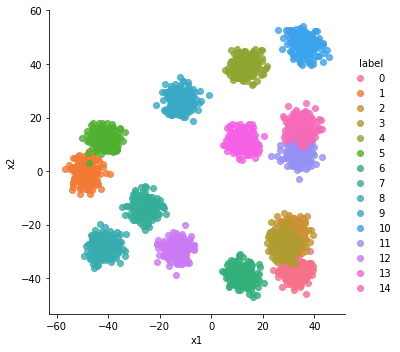

In [2]:
# そのまま実行します
X, y = make_blobs(n_samples=3000, centers=15, n_features=2,
                  cluster_std=3, random_state=2532689, center_box=[-50, 50])
df_data = pd.DataFrame(X, columns=["x1","x2"])
df_data["label"] = y
display(df_data.head())
sns.lmplot(x="x1", y="x2", hue="label", data=df_data,fit_reg=False)

In [3]:
# 標準化
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### [演習]
* 任意のkでk-meansを実行し、結果の散布図を描画してみましょう。
* 散布図はクラスターごとに色分けし、中心点も描画してください。
* エルボー図を描画してみましょう

In [4]:
# クラスタリング
clf = KMeans(n_clusters=10)
clf.fit(X_std)
y_pred = clf.predict(X_std)
print(y_pred)
print(clf.cluster_centers_)

[1 3 5 ... 0 2 5]
[[ 0.27811349  0.50763134]
 [-1.49185414 -0.9370104 ]
 [ 1.07526486  1.82935093]
 [ 0.8990313  -0.98640554]
 [-1.60398663  0.30427716]
 [-0.75605208 -0.68627697]
 [-0.50461717  1.06539023]
 [ 1.02650403  0.52128157]
 [ 0.3363417   1.54392095]
 [ 0.28046869 -1.32856168]]


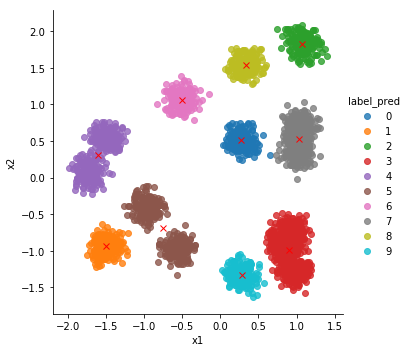

In [5]:
# クラスタリング結果の描画, 赤×は中心点
df_data = pd.DataFrame(X_std, columns=["x1","x2"])
df_data["label_pred"] = y_pred
sns.lmplot(x="x1", y="x2", hue="label_pred", data=df_data,fit_reg=False)
plt.plot(clf.cluster_centers_[:,0],clf.cluster_centers_[:,1], marker="x",ls="",color="r")

### エルボー図

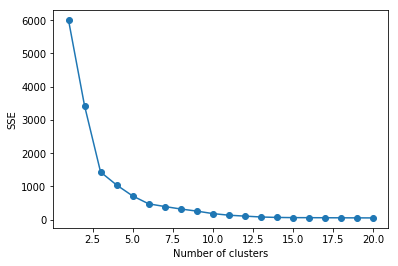

In [6]:
def plot_elbow(X, sta_k, end_k):
    sse = []
    for i in range(sta_k, end_k+1):
        clf = KMeans(n_clusters=i,random_state=1234)
        clf.fit(X)
        sse.append(clf.inertia_)

    plt.plot(range(sta_k, end_k+1), sse, marker="o")
    plt.xlabel("Number of clusters")
    plt.ylabel("SSE")
    plt.show()
    
plot_elbow(X_std, 1, 20)

## [演習2] 分類数が未知のデータをクラスタリングする

#### データセット読み込み

ここでは、[Seeds Dataset](https://archive.ics.uci.edu/ml/datasets/seeds) を利用します。  
Iris と似ていますが、こちらは麦の種のサイズを記録したものです。  
これをクラスタリングしてみましょう。  
  
列の意味:
1. area A, 
2. perimeter P, 
3. compactness C = 4*pi*A/P^2, 
4. length of kernel, 
5. width of kernel, 
6. asymmetry coefficient 
7. length of kernel groove. 
  
実際にはラベルデータも含まれていますが、ラベルデータからは省きました。今回は、このラベルを正解データとしましょう。

(210, 7)


,0,1,2,3,4,5,6
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


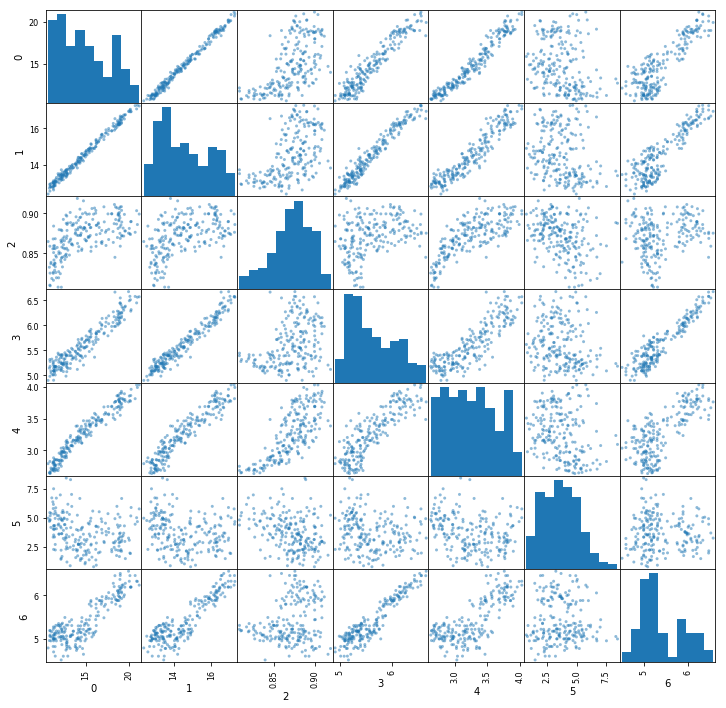

In [7]:
df_seeds = pd.read_csv("../1_data/seeds_dataset.csv", header=None, sep="\t")
print(df_seeds.shape)
display(df_seeds.head())

pd.plotting.scatter_matrix(df_seeds, figsize=(12,12))
plt.show()

In [8]:
# 標準化
X = df_seeds.values
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### [演習]
* エルボー図を描画してみましょう

### [問]
* 正解データのラベル数はいくつだと思いますか？ エルボー図だけでなく、散布図も参考に。

### エルボー図

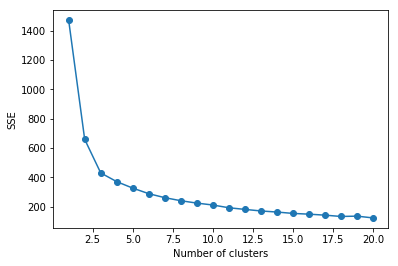

In [9]:
def plot_elbow(X, sta_k, end_k):
    sse = []
    for i in range(sta_k, end_k+1):
        clf = KMeans(n_clusters=i,random_state=1234)
        clf.fit(X)
        sse.append(clf.inertia_)

    plt.plot(range(sta_k, end_k+1), sse, marker="o")
    plt.xlabel("Number of clusters")
    plt.ylabel("SSE")
    plt.show()
    
plot_elbow(X_std, 1, 20)